In [73]:
import pandas as pd
import matplotlib.pyplot as plt

In [74]:
df1 = pd.read_csv("data/india/modi_final.csv")
df2 = pd.read_csv("data/india/manmohan.csv")

In [75]:
df1 = df1[["date","article_text"]]

In [76]:
df2.rename(columns={"text":"article_text"},inplace=True)

In [77]:
df1.head()

,date,article_text
0,2022-02-18,"\nYour Highness, My Brother,\nA warm welcome ..."
1,2022-02-18,Namaskar!\nMaharashtra Governor Shri Bhagat Si...
2,2022-02-16,I am delighted to join you at the Twenty First...
3,2022-02-11,I congratulate President Macron on this import...
4,2022-02-07,"Hon’ble Mr. Speaker,\nI am here to reply on Mo..."


In [78]:
df2.head()

,date,article_text
0,May 17 2014,"My Fellow Citizens,I address you today for the..."
1,March 4 2014,“I am delighted to return to this beautiful ci...
2,March 1 2014,“I am very happy to participate in the Nationa...
3,February 26 2014,“Today marks a very important step forward tow...
4,February 21 2014,"""Madam Speaker,As we come to the end of the jo..."


In [79]:
def get_month(month):
    month = month.lower()
    if month == "january" or month == "jan":
        return "01"
    elif month == "february" or month == "feb":
        return "02"
    elif month == "march" or month == "mar":
        return "03"
    elif month == "april" or month == "apr":
        return "04"
    elif month == "may":
        return "05"
    elif month == "june" or month == "jun":
        return "06"
    elif month == "july" or month == "jul":
        return "07"
    elif month == "august" or month == "aug":
        return "08"
    elif month == "september" or month == "sep":
        return "09"
    elif month == "october" or month == "oct":
        return "10"
    elif month == "november" or month == "nov":
        return "11"
    elif month == "december" or month == "dec":
        return "12"
    else:
        return "01"


def parse_date(date):
    month = date.split(" ")[0]
    day = date.split(" ")[1]
    year = date.split(" ")[2]

    month = get_month(month)
    day = day.zfill(2)

    return f"{day}/{month}/{year}"

In [80]:
df2["date"] = df2["date"].apply(parse_date)

In [81]:
df2["date"] = pd.to_datetime(df2["date"], format="%d/%m/%Y")
df2["date"] = df2["date"].dt.strftime("%Y-%m-%d")

In [82]:
df2

,date,article_text
0,2014-05-17,"My Fellow Citizens,I address you today for the..."
1,2014-03-04,“I am delighted to return to this beautiful ci...
2,2014-03-01,“I am very happy to participate in the Nationa...
3,2014-02-26,“Today marks a very important step forward tow...
4,2014-02-21,"""Madam Speaker,As we come to the end of the jo..."
...,...,...
1396,2004-07-31,"Hindi VersionMr. Chairman,Excellencies,Ladies ..."
1397,2004-07-26,Hindi Version Distinguished Members of the CSI...
1398,2004-07-03,"Hindi Version ""It gives me great pleasure to b..."
1399,2004-06-29,"Hindi Version ""I welcome you all to this Confe..."


In [83]:
df1["PM"] = "Modi"
df2["PM"] = "Manmohan"

In [84]:
df = pd.concat([df1,df2],axis=0)

In [85]:
df

,date,article_text,PM
0,2022-02-18,"\nYour Highness, My Brother,\nA warm welcome ...",Modi
1,2022-02-18,Namaskar!\nMaharashtra Governor Shri Bhagat Si...,Modi
2,2022-02-16,I am delighted to join you at the Twenty First...,Modi
3,2022-02-11,I congratulate President Macron on this import...,Modi
4,2022-02-07,"Hon’ble Mr. Speaker,\nI am here to reply on Mo...",Modi
...,...,...,...
1396,2004-07-31,"Hindi VersionMr. Chairman,Excellencies,Ladies ...",Manmohan
1397,2004-07-26,Hindi Version Distinguished Members of the CSI...,Manmohan
1398,2004-07-03,"Hindi Version ""It gives me great pleasure to b...",Manmohan
1399,2004-06-29,"Hindi Version ""I welcome you all to this Confe...",Manmohan


In [86]:
import re
import string
from nltk.stem import LancasterStemmer
from nltk.probability import FreqDist

from nltk.corpus import stopwords 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import DBSCAN
from nltk.sentiment.vader import SentimentIntensityAnalyzer

import seaborn as sns
%matplotlib inline

In [91]:
df["year"] = df["date"].apply(lambda x: int(x.split("-")[0]))
df1["year"] = df1["date"].apply(lambda x: int(x.split("-")[0]))
df2["year"] = df2["date"].apply(lambda x: int(x.split("-")[0]))

In [92]:
# to string Transcript column
df["article_text"] = df["article_text"].astype(str)
df1["article_text"] = df1["article_text"].astype(str)
df2["article_text"] = df2["article_text"].astype(str)

In [93]:
alphanumeric = lambda x: re.sub('\w*\d\w*', ' ', x)
punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower())
no_n = lambda x: re.sub('\n', '', x)
no_r = lambda x: re.sub('\r', '', x)
no_hyphen = lambda x: re.sub('-', ' ', x)
df['article_text'] = df.article_text.map(alphanumeric).map(punc_lower).map(no_n).map(no_r).map(no_hyphen)
df1['article_text'] = df1.article_text.map(alphanumeric).map(punc_lower).map(no_n).map(no_r).map(no_hyphen)
df2['article_text'] = df2.article_text.map(alphanumeric).map(punc_lower).map(no_n).map(no_r).map(no_hyphen)
df['Split'] = df.article_text.str.split()
df1['Split'] = df1.article_text.str.split()
df2['Split'] = df2.article_text.str.split()

In [94]:
stop_words2 = ['india', 'state', 'bharat', 'president', 'don', 'thank', 'mr', 'ms', 're',
               've', 'applause', 'transcript', 'anscript', 'country']
stop_words1 = set(stopwords.words('english'))
final_stops = list(stop_words1) + stop_words2

In [99]:
X = df2.article_text

In [100]:
cv = CountVectorizer(stop_words=final_stops, max_df=0.4, min_df = 5)

doc_word = cv.fit_transform(X)
X_t_cv  = cv.transform(X)


nmf_model = NMF(10)
doc_topic = nmf_model.fit_transform(doc_word)

topic_word_nmf = pd.DataFrame(nmf_model.components_.round(3), 
             index = ["component_1","component_2", "component_3","component_4", "component_5", 
                     "component_6","component_7", "component_8","component_9", "component_10"
                     ],
             columns = cv.get_feature_names())
topic_word_nmf

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aadhaar,aadhar,aadmi,aam,ab,ababa,abbas,abdul,abdullah,abe,...,सहय,हज,हत,हतर,हद,हनत,हब,हम,हमन,हर
component_1,0.000,0.000,0.006,0.006,0.000,0.000,0.000,0.413,0.055,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002,0.000,0.001
component_2,0.001,0.000,1.309,1.322,0.000,0.000,0.003,0.012,0.143,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000
component_3,0.000,0.000,0.000,0.000,0.000,5.191,0.001,0.000,0.015,0.021,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000
component_4,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.190,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000
component_5,0.005,0.002,0.000,0.005,0.182,0.000,0.006,0.041,0.000,0.027,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000
component_6,0.000,0.000,0.000,0.000,0.000,0.000,0.001,0.000,0.387,0.349,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002,0.000,0.000
component_7,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.059,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001,0.000,0.000
component_8,0.000,0.000,0.036,0.033,0.064,0.000,0.001,0.000,0.173,0.081,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.005,0.001,0.001
component_9,0.000,0.000,0.000,0.000,0.000,0.000,0.004,0.000,0.154,0.079,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000
component_10,0.000,0.001,0.196,0.194,0.019,0.000,0.000,0.000,0.000,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000


In [101]:
def display_topics(model, feature_names, no_top_words, topic_names=None):
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix)
        else:
            print("\nTopic: '",topic_names[ix],"'")
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [102]:
display_topics(nmf_model, cv.get_feature_names(), 10)


Topic  0
nuclear, plan, safeguards, agreement, separation, facilities, cooperation, states, fuel, july

Topic  1
every, peace, progress, employment, farmers, region, want, kashmir, better, opportunities

Topic  2
africa, ethiopia, african, international, nations, cooperation, united, training, institutions, peace

Topic  3
pakistan, nuclear, madam, enrichment, transfer, terrorism, statement, speaker, said, declaration

Topic  4
rural, sector, infrastructure, investment, states, plan, health, agriculture, private, financial

Topic  5
bangladesh, cooperation, agreement, relations, asia, south, trade, energy, border, power

Topic  6
life, peace, power, challenge, political, water, attention, regions, indians, live

Topic  7
science, research, energy, scientific, knowledge, technologies, scientists, congress, institutions, universities

Topic  8
afghanistan, members, honourable, strategy, region, afghan, partnership, friendship, building, cooperation

Topic  9
police, forces, force, law, 

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [105]:
doc_topic_nmf = pd.DataFrame(doc_topic.round(3),
                             index = df2.year.astype(int), 
                             columns = ["Nuclear_Agreements1","Peace_&_Development", "African_Relations", "Pakistan_&_Terrorism", "Rural_Development", "Science",  
                     "Science", "Nuclear_Agreements2","Neighbours", "Security"
                     ])
dtn = doc_topic_nmf.groupby(doc_topic_nmf.index).sum()

dtn.reset_index(level = 0, inplace = True)
graph_topics = dtn.groupby(dtn.year).sum()
graph_topics = dtn
# graph_topics.drop(['year'], axis=1, inplace = True) 
# set year as index
graph_topics.set_index("year", inplace=True)
# graph_topics.drop(['year'], axis=1, inplace = True) 
graph_topics.head()

,Nuclear_Agreements1,Peace_&_Development,African_Relations,Pakistan_&_Terrorism,Rural_Development,Science,Science,Nuclear_Agreements2,Neighbours,Security
year,,,,,,,,,,
2004,8.930,17.829,8.549,5.158,27.759,13.015,26.189,8.605,10.280,45.355
2005,26.021,66.726,19.237,17.983,109.658,49.396,18.532,35.976,30.385,81.644
2006,126.479,86.629,23.293,14.965,106.199,51.720,12.707,41.387,26.260,56.192
2007,42.164,59.570,24.868,8.163,72.194,31.540,10.493,25.124,14.468,36.003
2008,30.117,68.445,19.554,21.444,54.108,33.169,9.137,40.151,14.778,52.212


In [106]:
# get yearwise average of len(Split)
temp_df = df2.copy()
temp_df["len"] = len(temp_df["Split"])
temp_df

,date,article_text,PM,year,Split,len
0,2014-05-17,my fellow citizens i address you today for the...,Manmohan,2014,"[my, fellow, citizens, i, address, you, today,...",1401
1,2014-03-04,“i am delighted to return to this beautiful ci...,Manmohan,2014,"[“i, am, delighted, to, return, to, this, beau...",1401
2,2014-03-01,“i am very happy to participate in the nationa...,Manmohan,2014,"[“i, am, very, happy, to, participate, in, the...",1401
3,2014-02-26,“today marks a very important step forward tow...,Manmohan,2014,"[“today, marks, a, very, important, step, forw...",1401
4,2014-02-21,madam speaker as we come to the end of the jo...,Manmohan,2014,"[madam, speaker, as, we, come, to, the, end, o...",1401
...,...,...,...,...,...,...
1396,2004-07-31,hindi versionmr chairman excellencies ladies ...,Manmohan,2004,"[hindi, versionmr, chairman, excellencies, lad...",1401
1397,2004-07-26,hindi version distinguished members of the csi...,Manmohan,2004,"[hindi, version, distinguished, members, of, t...",1401
1398,2004-07-03,hindi version it gives me great pleasure to b...,Manmohan,2004,"[hindi, version, it, gives, me, great, pleasur...",1401
1399,2004-06-29,hindi version i welcome you all to this confe...,Manmohan,2004,"[hindi, version, i, welcome, you, all, to, thi...",1401


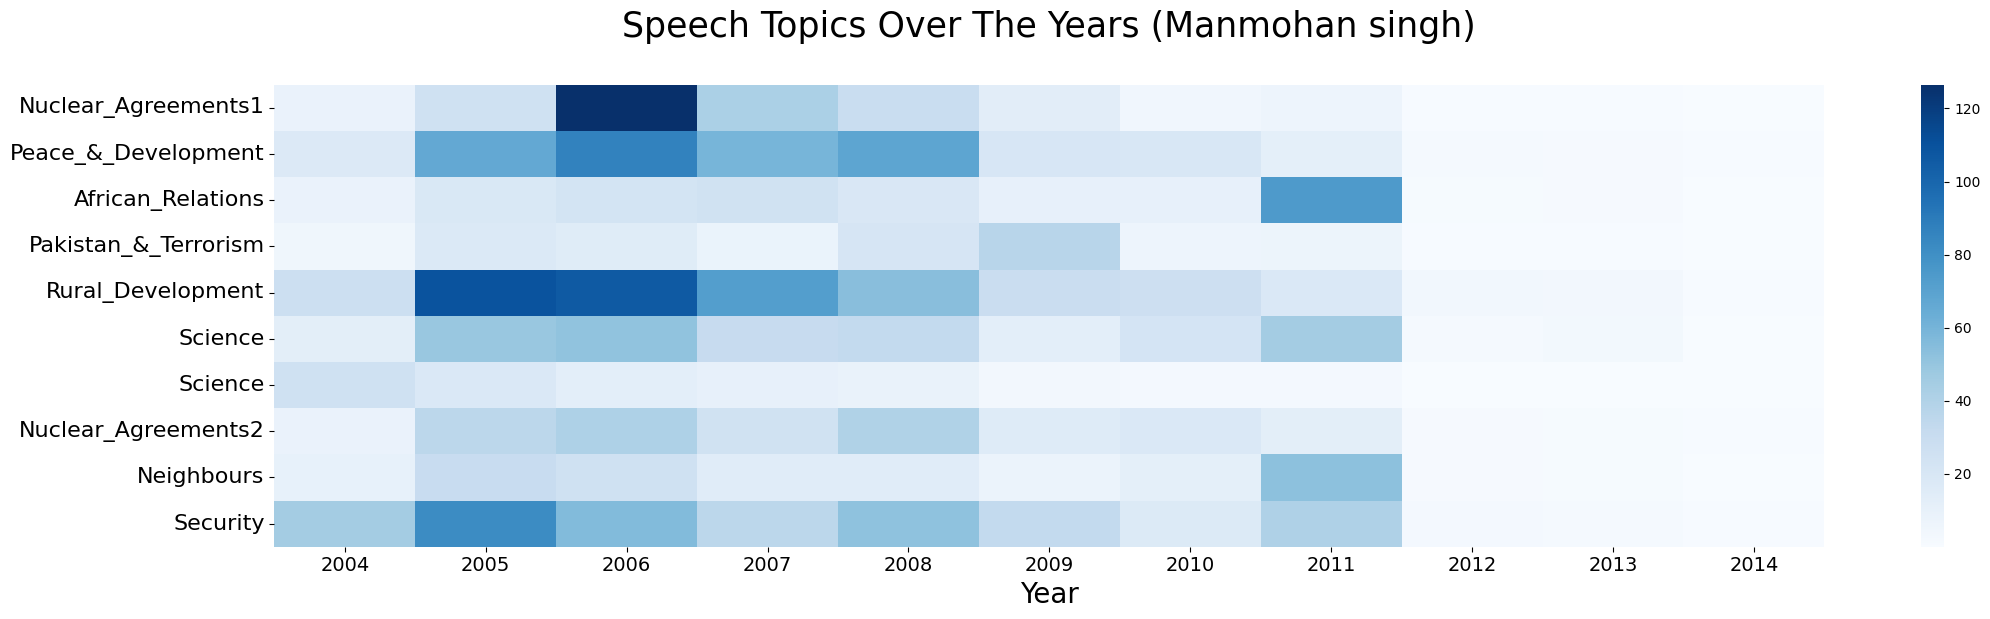

In [107]:
plt.figure(figsize = (25, 6))
sns.heatmap(graph_topics.T, annot=False, cbar=True, cmap="Blues")
plt.xlabel('Year', fontsize = 20)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 16)
plt.title('Speech Topics Over The Years (Manmohan singh)\n', fontsize=25)
plt.savefig('india_dump/Speech_heatmap_manmohan.png');

In [126]:
stop_words2 = ['india', 'state', 'bharat', 'president', 'don', 'thank', 'mr', 'ms', 're',
               've', 'applause', 'transcript', 'anscript', 'country', "sir", "prime", "modi", "yes", "brothers", "sisters", "dear", "countrymen", "ble",
               "honey", "sweet", "van", "speaker", "hon"]
stop_words1 = set(stopwords.words('english'))
final_stops = list(stop_words1) + stop_words2

In [127]:
X = df1.article_text

In [128]:
cv = CountVectorizer(stop_words=final_stops, max_df=0.4, min_df = 5)

doc_word = cv.fit_transform(X)
X_t_cv  = cv.transform(X)


nmf_model = NMF(10)
doc_topic = nmf_model.fit_transform(doc_word)

topic_word_nmf = pd.DataFrame(nmf_model.components_.round(3), 
             index = ["component_1","component_2", "component_3","component_4", "component_5", 
                     "component_6","component_7", "component_8","component_9", "component_10"
                     ],
             columns = cv.get_feature_names())
topic_word_nmf

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aadhaar,aadhar,aarogya,aatmanirbhar,aayog,abandon,abandoned,abdul,abe,abhiyaan,...,सह,सहय,हज,हत,हन,हनत,हम,हमन,हर,हरण
component_1,0.479,0.017,0.000,0.162,0.048,0.036,0.019,0.075,0.000,0.039,...,0.004,0.000,0.000,0.000,0.000,0.000,0.005,0.000,0.000,0.000
component_2,0.036,0.024,0.000,0.083,0.000,0.000,0.010,0.003,0.000,0.005,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.030,0.000
component_3,0.000,0.000,0.000,0.000,0.003,0.000,0.000,0.099,0.221,0.007,...,0.023,0.022,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
component_4,0.000,0.000,0.000,0.000,0.019,0.001,0.000,0.000,0.000,0.000,...,0.449,0.097,0.273,0.892,0.074,0.177,7.622,1.075,1.634,0.144
component_5,0.000,0.057,0.000,0.047,0.000,0.038,0.017,0.156,0.000,0.057,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
component_6,0.019,0.000,0.000,0.053,0.014,0.000,0.000,0.023,0.000,0.000,...,0.008,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
component_7,0.000,0.059,0.007,0.000,0.059,0.000,0.000,0.000,0.000,0.015,...,0.000,0.000,0.000,0.000,0.039,0.002,0.000,0.000,0.000,0.000
component_8,0.000,0.000,0.000,0.175,0.000,0.000,0.000,0.012,0.034,0.000,...,0.000,0.007,0.028,0.015,0.000,0.000,0.000,0.000,0.012,0.001
component_9,0.000,0.000,0.148,0.136,0.003,0.010,0.002,0.000,0.000,0.000,...,0.025,0.000,0.000,0.000,0.000,0.030,0.000,0.028,0.020,0.013
component_10,0.000,0.000,0.008,0.000,0.000,0.000,0.029,0.082,0.000,0.000,...,0.000,0.000,0.001,0.000,0.000,0.000,0.072,0.000,0.010,0.000


In [129]:
def display_topics(model, feature_names, no_top_words, topic_names=None):
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix)
        else:
            print("\nTopic: '",topic_names[ix],"'")
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [130]:
display_topics(nmf_model, cv.get_feature_names(), 10)


Topic  0
women, independence, money, rupees, five, freedom, bank, lakh, move, crores

Topic  1
farmers, small, agricultural, produce, farming, msp, land, reforms, rupees, sell

Topic  2
africa, partnership, region, cooperation, security, asia, trade, african, nations, summit

Topic  3
और, हम, कर, एक, रह, पर, रत, नह, आज, yoga

Topic  4
children, things, family, something, yoga, ki, young, parents, baat, mann

Topic  5
education, policy, students, children, teachers, science, start, research, knowledge, contraction

Topic  6
water, villages, village, gujarat, mission, jal, campaign, conservation, scheme, lakh

Topic  7
kashi, contraction, assam, north, east, projects, revolutionising, region, connectivity, facilities

Topic  8
corona, medical, village, villages, treatment, scheme, crisis, contraction, vaccines, fight

Topic  9
kashmir, jammu, ladakh, constitution, house, east, pakistan, north, respected, democracy


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [131]:
doc_topic_nmf = pd.DataFrame(doc_topic.round(3),
                             index = df1.year.astype(int), 
                             columns = ["Economy","Agriculture", "International_Relations", "Misc", "General_Speech_Words",  
                      "Education_Schemes", "Village_Schemes", "Development", "Health", "Pakistan_Issues"
                     ])
dtn = doc_topic_nmf.groupby(doc_topic_nmf.index).sum()

dtn.reset_index(level = 0, inplace = True)
graph_topics = dtn.groupby(dtn.year).sum()
graph_topics = dtn
# graph_topics.drop(['year'], axis=1, inplace = True) 
# set year as index
graph_topics.set_index("year", inplace=True)
# graph_topics.drop(['year'], axis=1, inplace = True) 
graph_topics.head()

,Economy,Agriculture,International_Relations,Misc,General_Speech_Words,Education_Schemes,Village_Schemes,Development,Health,Pakistan_Issues
year,,,,,,,,,,
2014,2.557,0.295,3.469,0.719,3.663,0.848,0.593,1.099,0.123,0.699
2015,14.719,6.242,30.976,8.246,12.215,5.803,5.661,4.096,1.298,1.745
2016,19.591,5.461,22.285,2.554,14.972,8.471,10.441,6.484,1.742,2.422
2017,15.778,2.827,13.275,7.726,16.152,3.650,5.088,7.530,1.556,1.541
2018,7.821,3.287,8.777,5.423,7.978,2.483,4.801,4.019,1.452,1.746


In [134]:
graph_topics

,Economy,Agriculture,International_Relations,Misc,General_Speech_Words,Education_Schemes,Village_Schemes,Development,Health,Pakistan_Issues
year,,,,,,,,,,
2014,2.557,0.295,3.469,0.719,3.663,0.848,0.593,1.099,0.123,0.699
2015,14.719,6.242,30.976,8.246,12.215,5.803,5.661,4.096,1.298,1.745
2016,19.591,5.461,22.285,2.554,14.972,8.471,10.441,6.484,1.742,2.422
2017,15.778,2.827,13.275,7.726,16.152,3.650,5.088,7.530,1.556,1.541
2018,7.821,3.287,8.777,5.423,7.978,2.483,4.801,4.019,1.452,1.746
2019,20.053,2.986,10.703,4.846,15.397,5.608,18.068,10.297,3.458,14.817
2020,29.412,42.635,9.217,6.312,24.043,36.529,20.414,56.050,51.572,19.586
2021,34.670,36.503,7.958,4.231,26.245,39.341,26.541,118.590,66.180,6.177
2022,7.317,4.685,1.639,0.752,3.175,3.254,1.897,9.587,5.957,1.511


In [132]:
# get yearwise average of len(Split)
temp_df = df1.copy()
temp_df["len"] = len(temp_df["Split"])
temp_df

,date,article_text,PM,year,Split,len
0,2022-02-18,your highness my brother a warm welcome to t...,Modi,2022,"[your, highness, my, brother, a, warm, welcome...",850
1,2022-02-18,namaskar maharashtra governor shri bhagat sing...,Modi,2022,"[namaskar, maharashtra, governor, shri, bhagat...",850
2,2022-02-16,i am delighted to join you at the twenty first...,Modi,2022,"[i, am, delighted, to, join, you, at, the, twe...",850
3,2022-02-11,i congratulate president macron on this import...,Modi,2022,"[i, congratulate, president, macron, on, this,...",850
4,2022-02-07,hon’ble mr speaker i am here to reply on moti...,Modi,2022,"[hon’ble, mr, speaker, i, am, here, to, reply,...",850
...,...,...,...,...,...,...
845,2014-11-02,my dear fellow countrymen i am with you again...,Modi,2014,"[my, dear, fellow, countrymen, i, am, with, yo...",850
846,2014-10-31,following is the english rendering of prime mi...,Modi,2014,"[following, is, the, english, rendering, of, p...",850
847,2014-10-11,prime minister shri narendra modi today laun...,Modi,2014,"[prime, minister, shri, narendra, modi, today,...",850
848,2014-10-03,my dear countrymen today is the holy festival ...,Modi,2014,"[my, dear, countrymen, today, is, the, holy, f...",850


In [135]:
import numpy as np
graph_topics_log = np.log(graph_topics)

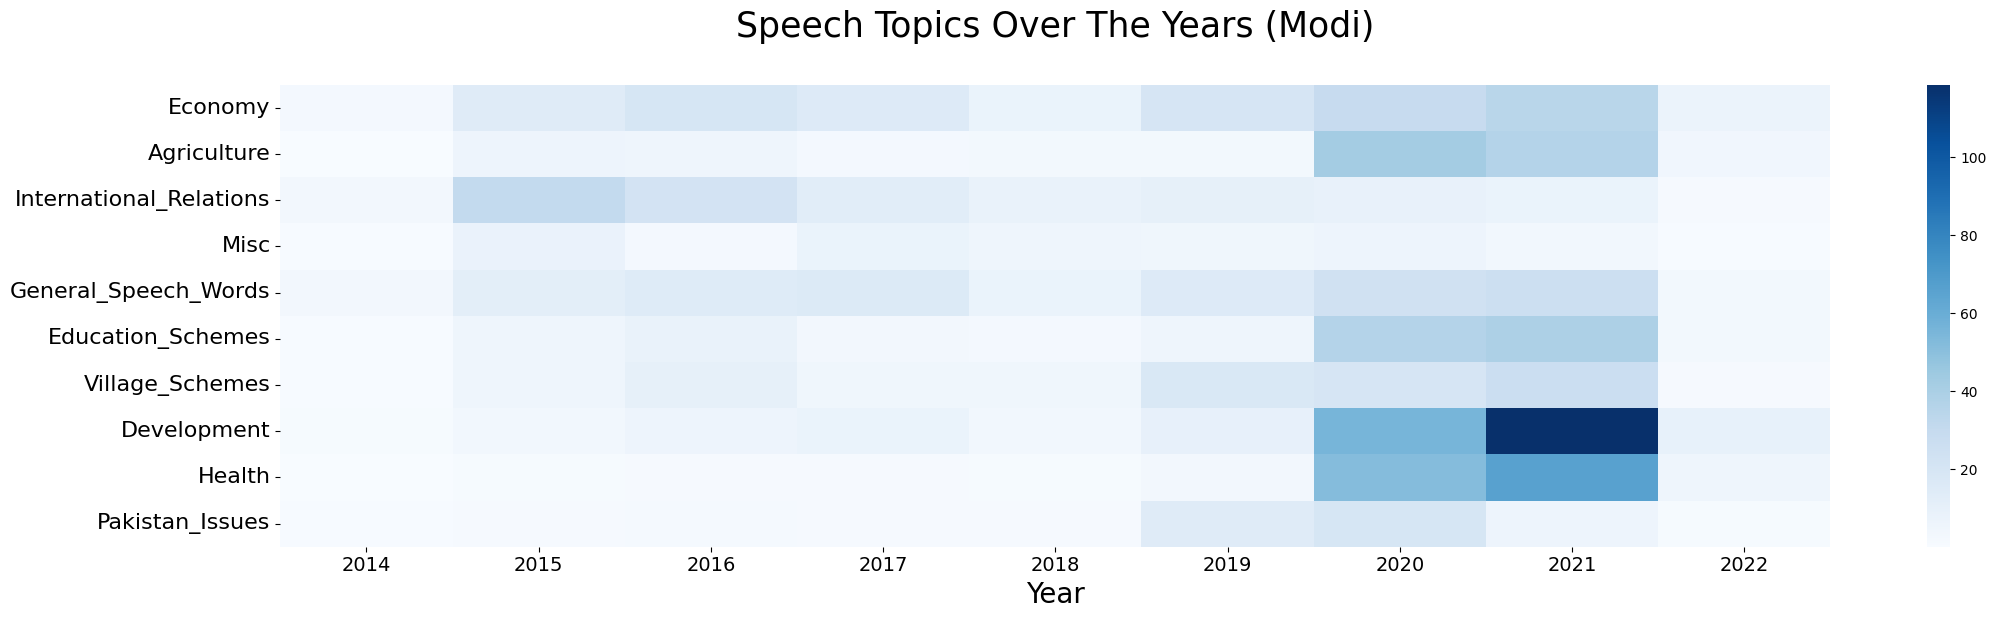

In [133]:
plt.figure(figsize = (25, 6))
sns.heatmap(graph_topics.T, annot=False, cbar=True, cmap="Blues")
plt.xlabel('Year', fontsize = 20)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 16)
plt.title('Speech Topics Over The Years (Modi)\n', fontsize=25)
plt.savefig('india_dump/Speech_heatmap_modi.png');

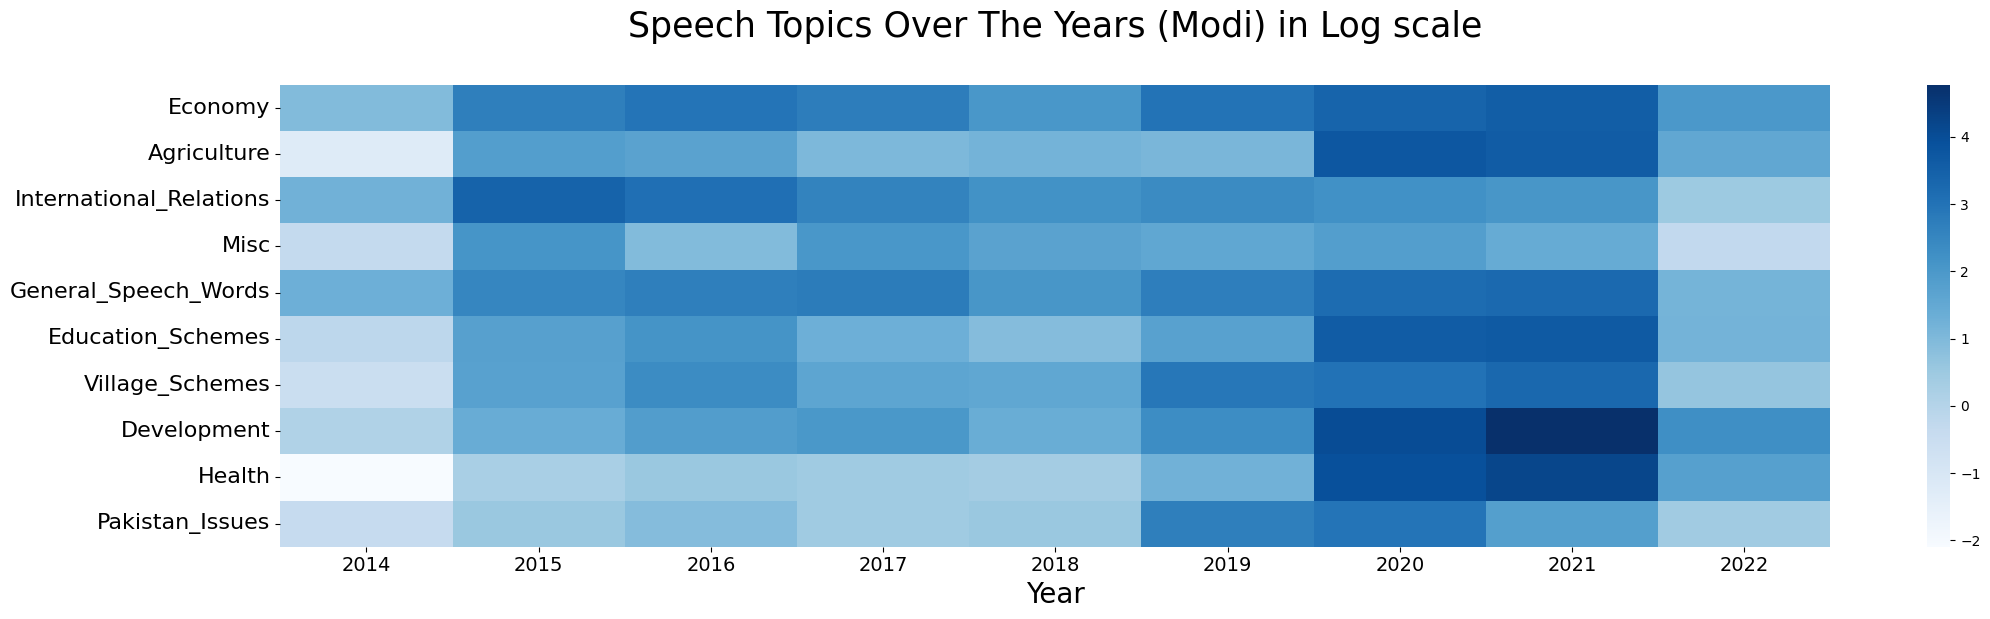

In [137]:
plt.figure(figsize = (25, 6))
sns.heatmap(graph_topics_log.T, annot=False, cbar=True, cmap="Blues")
plt.xlabel('Year', fontsize = 20)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 16)
plt.title('Speech Topics Over The Years (Modi) in Log scale\n', fontsize=25)
plt.savefig('india_dump/Speech_heatmap_modi_log.png');

In [138]:
df

,date,article_text,PM,year,Split
0,2022-02-18,your highness my brother a warm welcome to t...,Modi,2022,"[your, highness, my, brother, a, warm, welcome..."
1,2022-02-18,namaskar maharashtra governor shri bhagat sing...,Modi,2022,"[namaskar, maharashtra, governor, shri, bhagat..."
2,2022-02-16,i am delighted to join you at the twenty first...,Modi,2022,"[i, am, delighted, to, join, you, at, the, twe..."
3,2022-02-11,i congratulate president macron on this import...,Modi,2022,"[i, congratulate, president, macron, on, this,..."
4,2022-02-07,hon’ble mr speaker i am here to reply on moti...,Modi,2022,"[hon’ble, mr, speaker, i, am, here, to, reply,..."
...,...,...,...,...,...
1396,2004-07-31,hindi versionmr chairman excellencies ladies ...,Manmohan,2004,"[hindi, versionmr, chairman, excellencies, lad..."
1397,2004-07-26,hindi version distinguished members of the csi...,Manmohan,2004,"[hindi, version, distinguished, members, of, t..."
1398,2004-07-03,hindi version it gives me great pleasure to b...,Manmohan,2004,"[hindi, version, it, gives, me, great, pleasur..."
1399,2004-06-29,hindi version i welcome you all to this confe...,Manmohan,2004,"[hindi, version, i, welcome, you, all, to, thi..."


In [140]:
from wordcloud import WordCloud

In [147]:
extra_stop_words = ["today", "also", "would"]
final_stops += extra_stop_words

In [148]:
def wordCloud(president):
    comment_words = '' 
    stopwords = set(final_stops) 
    
    pres_df = df[df.PM == president]
    section = pres_df.article_text
    
    for val in section: 

        # typecaste each val to string 
        val = str(val) 

        # split the value 
        tokens = val.split() 

        comment_words += " ".join(tokens)+" "

    word_cloud = WordCloud(width = 800, height = 800, 
                    background_color ='white', 
                    stopwords = stopwords, 
                    min_font_size = 10).generate(comment_words) 

    # plot the WordCloud image                        
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(word_cloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0)
    plt.title(president, fontsize = 20)
    plt.savefig('india_dump/wordcloud_'+president+'.png');

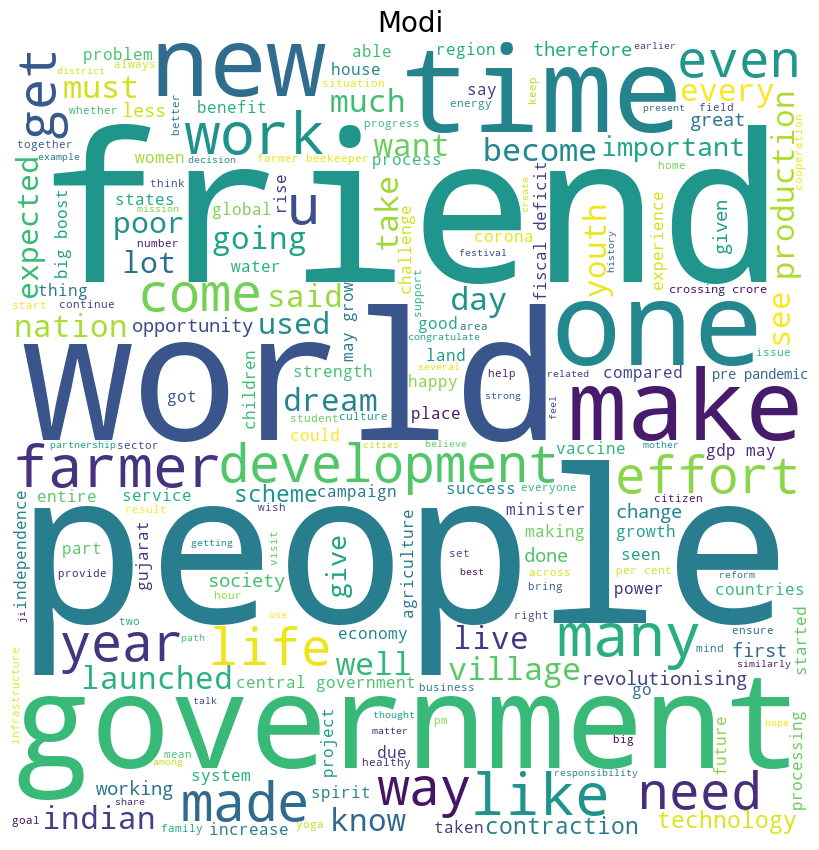

In [149]:
wordCloud("Modi")

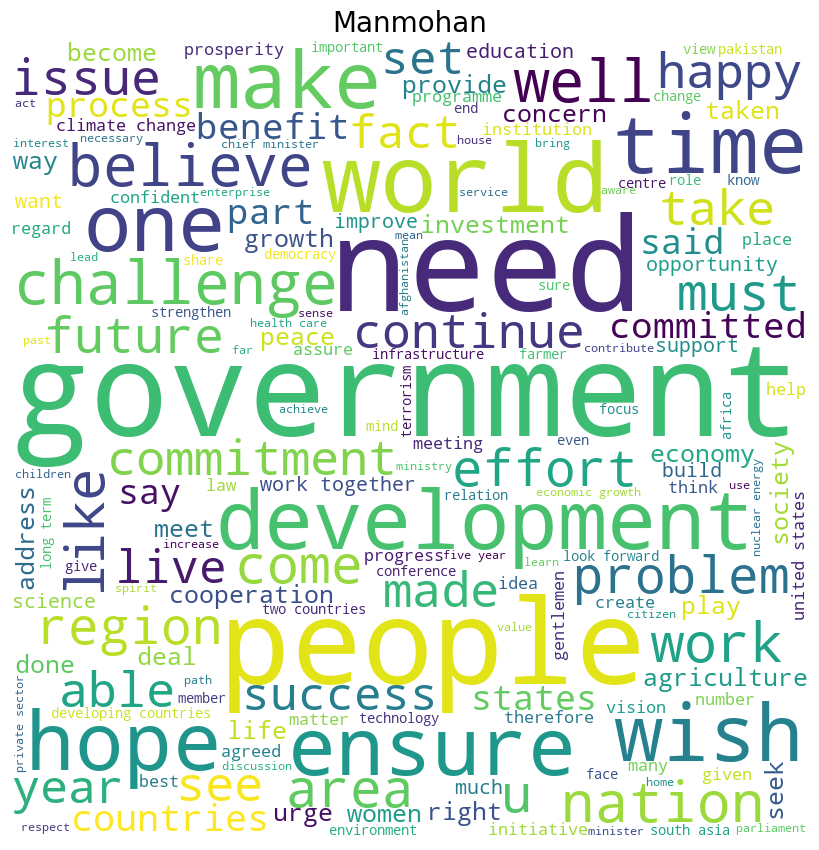

In [150]:
wordCloud("Manmohan")

In [151]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment import sentiment_analyzer

In [152]:
allMywords = topic_word_nmf.columns
allw = [w for w in allMywords]

In [153]:
def negative(text):
    negatives = []
    for line in text:
        sp = ' '.join(line)
        score = SentimentIntensityAnalyzer().polarity_scores(sp)
        negatives.append(score['neg'])
    return negatives

In [154]:
def sentiment_positive(text):
    positives = []
    for line in text:
        sp = ' '.join(line)
        score = SentimentIntensityAnalyzer().polarity_scores(sp)
        positives.append(score['pos'])
    return positives

In [155]:
df['Sentiment'] = sentiment_positive(df.Split)
df_neg =df.copy()

In [156]:
df_neg['Negative'] = negative(df.Split)
df_neg.sample()

,date,article_text,PM,year,Split,Sentiment,Negative
562,2018-05-31,namaste singapore good evening नी हाओसलामत दत...,Modi,2018,"[namaste, singapore, good, evening, नी, हाओसला...",0.19,0.022


In [157]:
def sentiment_analysis_graph(president):
    filter1 = df.PM.str.contains(president)
    func_df = df.loc[filter1]
    text = ''.join(str(func_df.Split[:]))
    score = SentimentIntensityAnalyzer().polarity_scores(text)
    return score['pos']

In [158]:
df

,date,article_text,PM,year,Split,Sentiment
0,2022-02-18,your highness my brother a warm welcome to t...,Modi,2022,"[your, highness, my, brother, a, warm, welcome...",0.264
1,2022-02-18,namaskar maharashtra governor shri bhagat sing...,Modi,2022,"[namaskar, maharashtra, governor, shri, bhagat...",0.125
2,2022-02-16,i am delighted to join you at the twenty first...,Modi,2022,"[i, am, delighted, to, join, you, at, the, twe...",0.233
3,2022-02-11,i congratulate president macron on this import...,Modi,2022,"[i, congratulate, president, macron, on, this,...",0.154
4,2022-02-07,hon’ble mr speaker i am here to reply on moti...,Modi,2022,"[hon’ble, mr, speaker, i, am, here, to, reply,...",0.121
...,...,...,...,...,...,...
1396,2004-07-31,hindi versionmr chairman excellencies ladies ...,Manmohan,2004,"[hindi, versionmr, chairman, excellencies, lad...",0.213
1397,2004-07-26,hindi version distinguished members of the csi...,Manmohan,2004,"[hindi, version, distinguished, members, of, t...",0.200
1398,2004-07-03,hindi version it gives me great pleasure to b...,Manmohan,2004,"[hindi, version, it, gives, me, great, pleasur...",0.227
1399,2004-06-29,hindi version i welcome you all to this confe...,Manmohan,2004,"[hindi, version, i, welcome, you, all, to, thi...",0.168


In [160]:
df_sent = df.copy().sort_values(by = 'year')
df_sent = df_sent.groupby(['PM'], sort=False).mean().reset_index()
df_sent.to_csv('india_dump/PM_sentiment_pos.csv')
df_sent

,PM,year,Sentiment
0,Manmohan,2008.52177,0.190789
1,Modi,2018.86000,0.190529


In [163]:
df_sent = df_neg.copy().sort_values(by = 'year')
df_sent = df_sent.groupby(['PM'], sort=False).mean().reset_index()
df_sent.to_csv('india_dump/PM_sentiment_neg.csv')
df_sent

,PM,year,Sentiment,Negative
0,Manmohan,2008.52177,0.190789,0.039176
1,Modi,2018.86000,0.190529,0.034502


/Users/kshitijalwadhi/Library/Python/3.10/lib/python/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


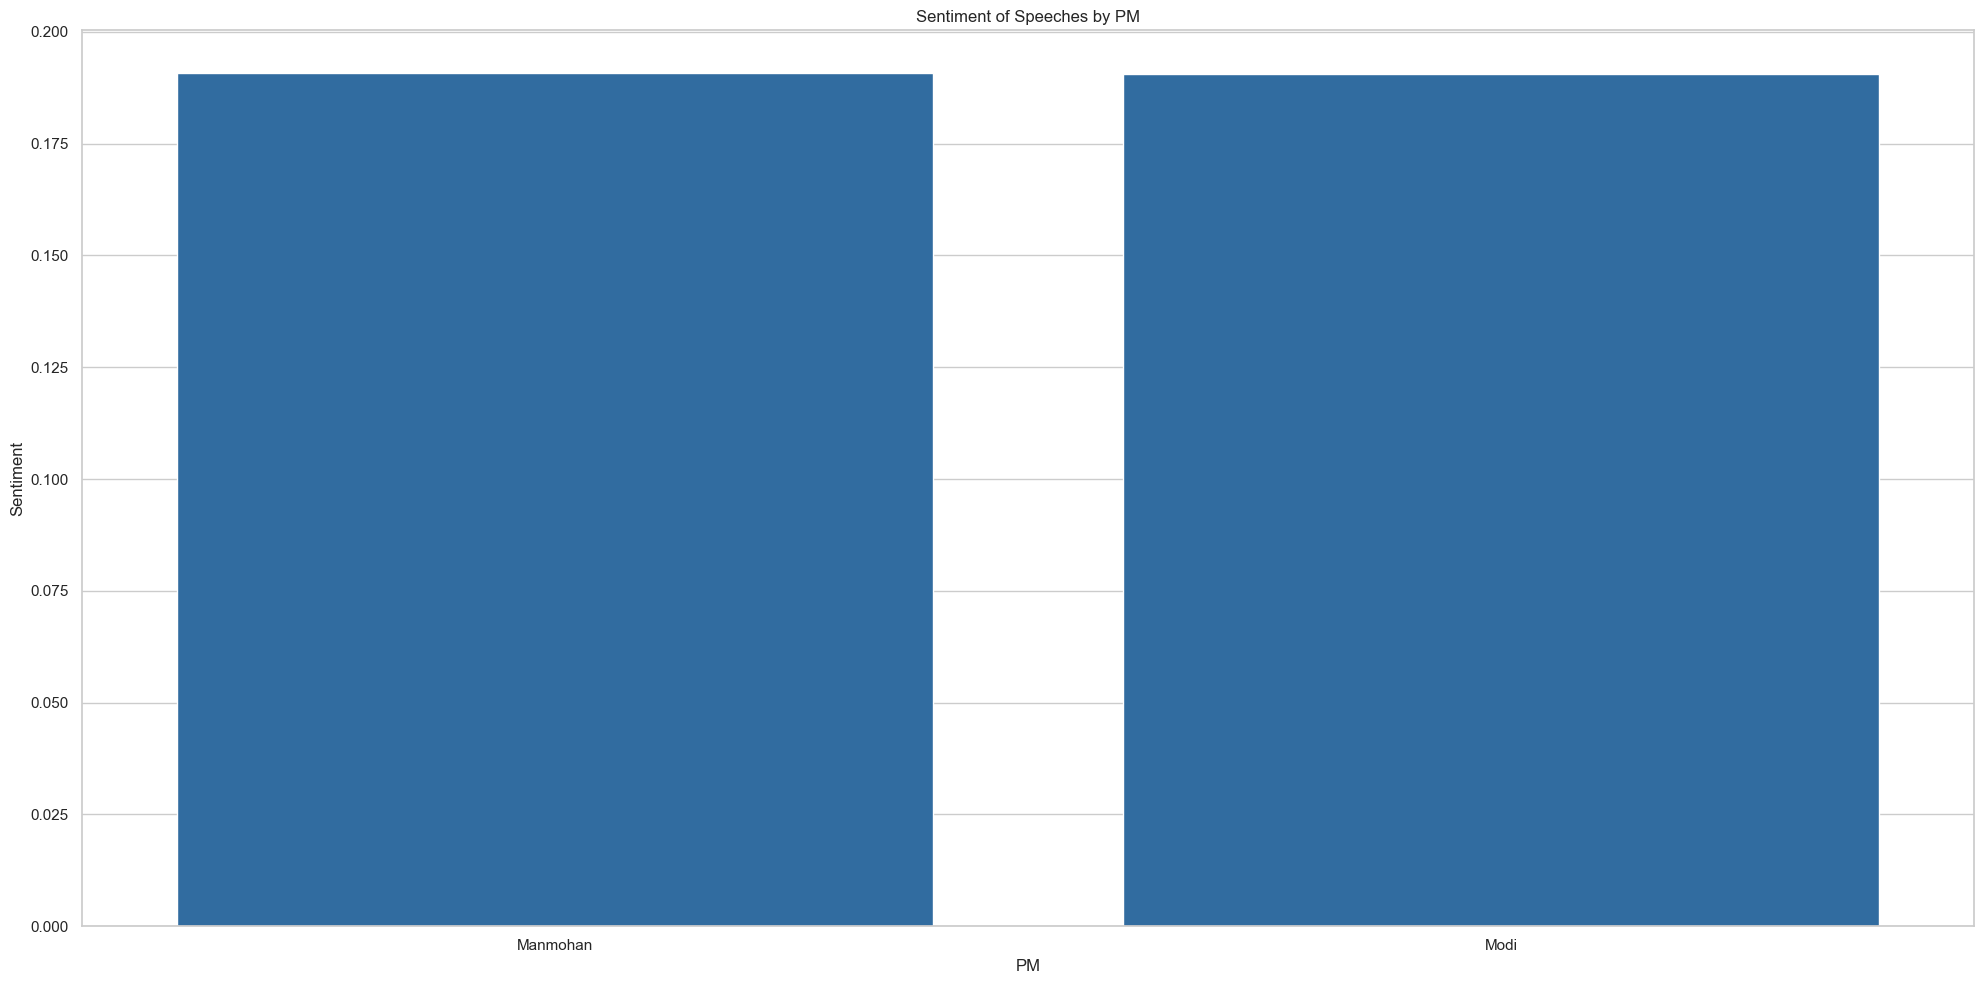

In [165]:
# bar plots of sentiment for each president using seaborn
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm

from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

sns.set_theme(style="whitegrid")

plt.figure(figsize=(20,10))
sns.barplot(x="PM", y="Sentiment", data=df_sent, palette = cm.Blues(df_sent.Sentiment*4))
plt.title('Sentiment of Speeches by PM')
plt.savefig('india_dump/sentiment_bar.png')